<a href="https://colab.research.google.com/github/singh06-08/Hotel-booking-analysis/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
#import numpy
import numpy as np
#import pandas
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define the path where data is kept
data=pd.read_csv('/content/drive/MyDrive/Copy of Hotel Bookings.csv')

In [ ]:
#get rows & columns
data.shape

(119390, 32)

In [ ]:
#get detail information of data provided using info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
data

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
0                          0       2  ...    No Deposit    NaN     NaN   
1                          0       2  ...    No Deposit    NaN     NaN   
2                          1       1  ...    No Deposit    NaN     NaN   
3                          1       1  ...    No Deposit  304.0     NaN   
4                          2       2  ...    No Deposit  240.0     NaN   
...                      ...     ...  ...           ...    ...     ...   
119385                     5       2  ...    No Deposit  394.0     NaN   
119386                     5       3  ...    No Deposit    9.0     NaN   
119387                     5       2  ...    No Deposit    9.0     NaN   
119388                     5       2  ...    No Deposit   89.0     NaN   
119389                     7       2  ...    No Deposit    9.0     NaN   

       days_in_waiting_list customer_type     adr  \
0                         0     Transient    0.00   
1                         0     Transient    0.00   
2                         0     Transient   75.00   
3                         0     Transient   75.00   
4                         0     Transient   98.00   
...                     ...           ...     ...   
119385                    0     Transient   96.14   
119386                    0     Transient  225.43   
119387                    0     Transient  157.71   
119388                    0     Transient  104.40   
119389                    0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
0                                 0                          0   
1                                 0                          0   
2                                 0                          0   
3             

In [ ]:
#find null values in given data set
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
data.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

In [ ]:
#import seaborn
import seaborn as sns
import matplotlib.pyplot as plt
        

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


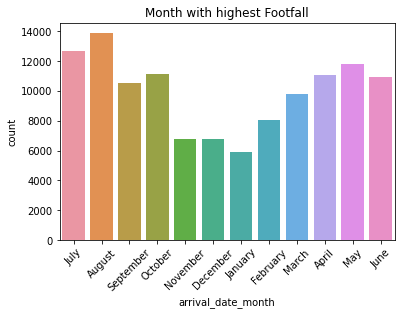

In [ ]:
#obtain trend of tourists on monthly basis
title='Month with highest Footfall'
yr=sns.countplot(data['arrival_date_month'])
plt.title(title)
plt.ioff()
plt.xticks(rotation=45)
plt.savefig('count.jpg')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


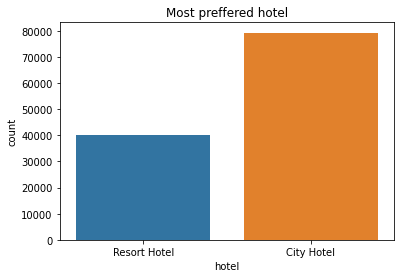

In [ ]:
#find out which type of hotel is more preffered
title='Most preffered hotel'
yr=sns.countplot(data['hotel'])
plt.title(title)
plt.ioff()
plt.savefig('count.jpg')

In [ ]:
fig=px.pie(data,names='hotel')
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


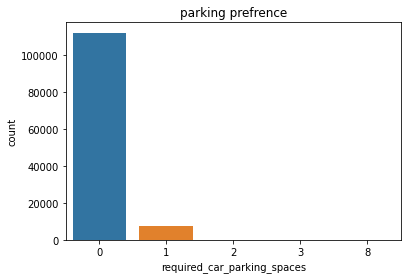

In [ ]:
#pakring preference among tourists
title='parking prefrence'
yr=sns.countplot(data['required_car_parking_spaces'])
plt.title(title)
plt.ioff()
plt.savefig('count.jpg')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


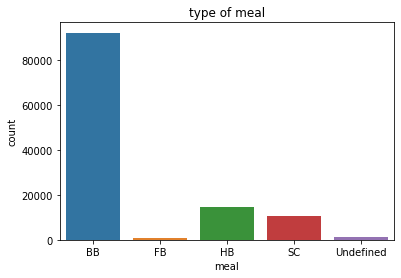

In [ ]:
#observe which meal is preffered most
title='type of meal'
yr=sns.countplot(data['meal'])
plt.title(title)
plt.ioff()
plt.savefig('count.jpg')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


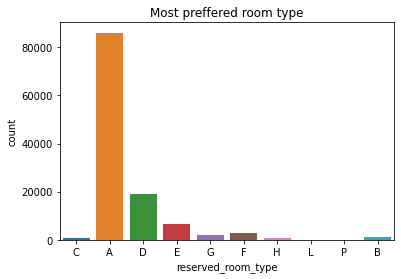

In [ ]:
#visualize which room type is booked most 
title='Most preffered room type'
yr=sns.countplot(data['reserved_room_type'])
plt.title(title)
plt.ioff()
plt.savefig('count.jpg')

In [ ]:
import plotly.express as px

In [ ]:
#visualize adr monthwise
fig=px.pie(data,names='arrival_date_month', values='adr')
fig.show()
plt.savefig('piechart.jpg')


<Figure size 432x288 with 0 Axes>

In [ ]:
#observe which hotel have more repeated guests
fig=px.pie(data,names='hotel', values='is_repeated_guest')
fig.show()

In [ ]:
#observe which channel is more preferred for booking 
fig=px.pie(data,names='distribution_channel')
fig.show()

In [ ]:
#visualize which year has more tourist footfall
fig=px.pie(data,names='arrival_date_year')
fig.show()

In [ ]:
#corelation between various columns
new =data[['hotel',
           'is_canceled',	'lead_time',	'arrival_date_year',	'arrival_date_month',	'arrival_date_week_number',	'arrival_date_day_of_month',	'stays_in_weekend_nights',	'stays_in_week_nights',	'adults'	]]

In [ ]:
corr_df = new.corr()

In [ ]:
corr_df

is_canceled  lead_time  arrival_date_year  \
is_canceled                   1.000000   0.293123           0.016660   
lead_time                     0.293123   1.000000           0.040142   
arrival_date_year             0.016660   0.040142           1.000000   
arrival_date_week_number      0.008148   0.126871          -0.540561   
arrival_date_day_of_month    -0.006130   0.002268          -0.000221   
stays_in_weekend_nights      -0.001791   0.085671           0.021497   
stays_in_week_nights          0.024765   0.165799           0.030883   
adults                        0.060017   0.119519           0.029635   

                           arrival_date_week_number  \
is_canceled                                0.008148   
lead_time                                  0.126871   
arrival_date_year                         -0.540561   
arrival_date_week_number                   1.000000   
arrival_date_day_of_month                  0.066809   
stays_in_weekend_nights                    0.018208   
stays_in_week_nights                       0.015558   
adults                                     0.025909   

                           arrival_date_day_of_month  stays_in_weekend_nights  \
is_canceled                                -0.006130                -0.001791   
lead_time                                   0.002268                 0.085671   
arrival_date_year                          -0.000221                 0.021497   
arrival_date_week_number                    0.066809                 0.018208   
arrival_date_day_of_month                   1.000000                -0.016354   
stays_in_weekend_nights                    -0.016354                 1.000000   
stays_in_week_nights                       -0.028174                 0.498969   
adults                                     -0.001566                 0.091871   

                           stays_in_week_nights    adults  
is_canceled                            0.024765  0.060017  
lead_time                              0.165799  0.119519  
arrival_date_year                      0.030883  0.029635  
arrival_date_week_number               0.015558  0.025909  
arrival_date_day_of_month             -0.028174 -0.001566  
stays_in_weekend_nights                0.498969  0.091871  
stays_in_week_nights                   1.000000  0.092976  
adults                                 0.092976  1.000000

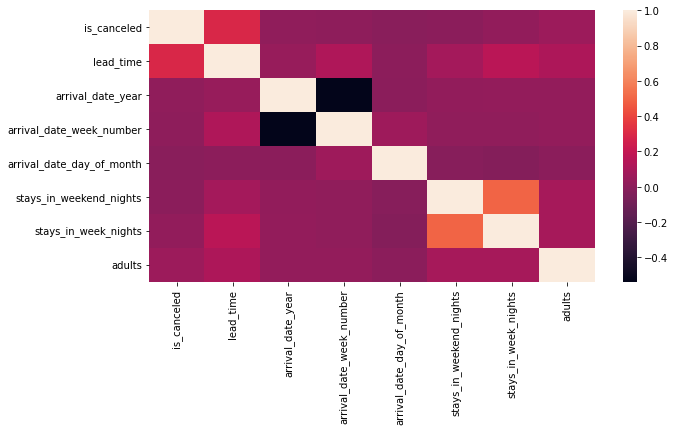

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_df)


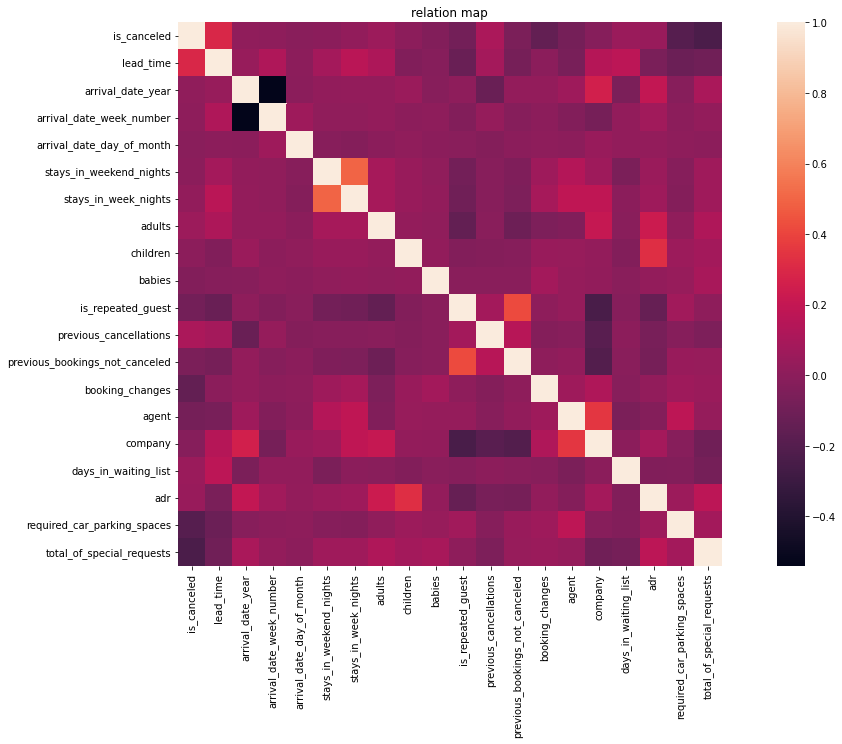

In [ ]:
plt.figure(figsize=(20,10))
title='relation map'
sns.heatmap(data.corr(),square=True)
plt.title(title)
plt.ioff()

In [ ]:
fig=px.pie(data,names='country',)
fig.show()